In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import pickle
import math
import gc
from pathlib import Path
from statistics import mean, StatisticsError
import multirecording_spikeanalysis_edit as spike

# It takes several steps to create the timestamp_dicts, refer to Ephys_Analysis_Notebook to create
timestamp_dicts = pickle.load(open('timestamp_dicts.pkl', 'rb'))

# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'recordings' / 'updated_phys' / 'test'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
Unit 92 is unsorted & has 2494 spikes
Unit 92 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
Unit 103 is unsorted & has 512 spikes
Unit 103 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [2]:
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in timestamp_dicts:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = timestamp_dicts[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject
        
spike_analysis = spike.SpikeAnalysis_MultiRecording(ephys_data, timebin = 100, ignore_freq = 0.5)

All set to analyze


In [3]:
event_df = spike_analysis.create_spiketrain_df()

Rounded array for rewarded in 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec: [[18492 18592]
 [19092 19192]
 [19642 19742]
 [20292 20392]
 [20842 20942]
 [21342 21442]
 [21842 21942]
 [22892 22992]
 [24092 24192]
 [25292 25392]
 [26392 26492]
 [27242 27342]
 [28442 28542]
 [29042 29142]
 [29692 29792]
 [30292 30392]
 [31042 31142]
 [32042 32142]
 [32992 33092]
 [33492 33592]]
Rounded array for win in 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec: [[ 1692  1792]
 [ 4792  4892]
 [ 6492  6592]
 [ 7542  7642]
 [ 8042  8142]
 [ 8842  8942]
 [ 9492  9592]
 [10142 10242]
 [11342 11442]
 [13092 13192]
 [13792 13892]
 [14892 14992]
 [15492 15592]]
Rounded array for lose in 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec: [[  492   592]
 [ 2842  2942]
 [ 3742  3842]
 [ 4292  4392]
 [ 5742  5842]
 [10642 10742]
 [12292 12392]]
Rounded array for omission in 20230612_101430_standard_comp_to_training_D1_subj_1-3_t

In [4]:
event_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2713,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,18,15,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2715,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,19,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
event_df['bin_1'].value_counts()

bin_1
0.0    2042
1.0     495
2.0     102
3.0      26
4.0      11
5.0       1
6.0       1
Name: count, dtype: int64

In [6]:
recordings = spike_analysis.ephyscollection.collection
recording_name = '20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec'
recording1 = recordings.get(recording_name)
recording1.event_dict

{'rewarded': array([], dtype=int64),
 'win': array([], dtype=int64),
 'lose': array([[  56560,   66560],
        [ 176561,  186561],
        [ 291562,  301563],
        [ 381564,  391564],
        [ 436564,  446564],
        [ 486565,  496565],
        [ 581566,  591566],
        [ 656567,  666567],
        [ 761568,  771568],
        [ 811569,  821569],
        [ 891570,  901570],
        [ 956571,  966571],
        [1021572, 1031572],
        [1071572, 1081572],
        [1141573, 1151573],
        [1236574, 1246574],
        [1316575, 1326575],
        [1386576, 1396576],
        [1496578, 1506578],
        [1556578, 1566578]], dtype=int64),
 'omission': array([], dtype=int64),
 'both_rewarded': array([[2036584, 2046584],
        [2096585, 2106585],
        [2151586, 2161586],
        [2216587, 2226587],
        [2271587, 2281587],
        [2321588, 2331588],
        [2371589, 2381589],
        [2476590, 2486590],
        [2596591, 2606592],
        [2716593, 2726593],
        [28265

In [7]:
np.ceil(np.array([3536603, 3546604]) / 100).astype(int)

array([35367, 35467])

In [8]:
recording1.unit_spiketrains

{9: array([1, 1, 0, ..., 0, 0, 0], dtype=int64),
 24: array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 76: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 10: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 94: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 87: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 1: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 15: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 97: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 39: array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 2: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 11: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 77: array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [9]:
len(recording1.unit_spiketrains[9])

33673

In [10]:
len(recording1.unit_spiketrains[24])

33673

In [11]:
len(recording1.unit_spiketrains[76])

33673

In [12]:
len(recording1.unit_spiketrains[10])

33673

In [13]:
spiketrain_slice = []

In [14]:
len(spiketrain_slice)

0

In [15]:
testn2 = -2
testn1 = -1
test0 = 0
test1 = 1
test2 = 2

In [16]:
test1 < test2

True

In [17]:
test0 < test1

True

In [18]:
testn2 < test1

True

In [19]:
np.unique(recording1.unit_spiketrains[9])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [20]:
type(recording1.unit_spiketrains[9])

numpy.ndarray

In [21]:
np.bincount(recording1.unit_spiketrains[9])

array([ 9426, 10406,  7155,  3786,  1738,   716,   302,    89,    46,
           5,     3,     1], dtype=int64)

In [22]:
np.array(np.unique(recording1.unit_spiketrains[9], return_counts=True)).T

array([[    0,  9426],
       [    1, 10406],
       [    2,  7155],
       [    3,  3786],
       [    4,  1738],
       [    5,   716],
       [    6,   302],
       [    7,    89],
       [    8,    46],
       [    9,     5],
       [   10,     3],
       [   11,     1]], dtype=int64)

In [23]:
recording_name2 = '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec'
recording2 = recordings.get(recording_name2)
recording2.unit_spiketrains

{85: array([1, 1, 0, ..., 0, 0, 0], dtype=int64),
 55: array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 17: array([0, 1, 2, ..., 1, 0, 0], dtype=int64),
 24: array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
 68: array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 65: array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 98: array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 94: array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 2: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 33: array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 13: array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 59: array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 81: array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 19: array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 88: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 26: array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 5: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 36: array([0, 0, 0, ..., 1, 2, 2], dtype=int64),
 57: array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [24]:
len(recording2.unit_spiketrains[85])

34146

In [25]:
recording_name3 = '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec'
recording3 = recordings.get(recording_name3)
recording3.unit_spiketrains

{6: array([2, 1, 0, ..., 0, 1, 1], dtype=int64),
 60: array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 4: array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
 59: array([1, 2, 1, ..., 1, 1, 0], dtype=int64),
 39: array([0, 1, 0, ..., 0, 2, 0], dtype=int64),
 28: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 29: array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 54: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 52: array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 48: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 74: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 78: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 5: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 53: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 17: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 3: array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 80: array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [26]:
len(recording3.unit_spiketrains[6])

39848

In [27]:
recording_name4 = '20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec'
recording4 = recordings.get(recording_name4)
recording4.unit_spiketrains

{21: array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 53: array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 46: array([1, 0, 1, ..., 0, 0, 0], dtype=int64),
 45: array([1, 2, 1, ..., 1, 2, 0], dtype=int64),
 33: array([1, 0, 1, ..., 0, 1, 2], dtype=int64),
 109: array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
 76: array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 39: array([2, 1, 1, ..., 0, 0, 0], dtype=int64),
 26: array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 44: array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 22: array([0, 3, 1, ..., 1, 2, 0], dtype=int64),
 48: array([0, 1, 0, ..., 2, 1, 0], dtype=int64),
 74: array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 37: array([0, 0, 2, ..., 0, 0, 1], dtype=int64),
 58: array([0, 0, 1, ..., 1, 0, 0], dtype=int64),
 1: array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 23: array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 20: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 29: array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 115: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),

In [28]:
len(recording4.unit_spiketrains[21])

36026

In [29]:
event_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2713,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,18,15,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2715,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,19,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [30]:
# Empty spiketrain slice for recording 20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec unit 9, event both_rewarded, slice 17
select_df = event_df[event_df['Recording']=='20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec']

In [31]:
select_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101
1117,20230622_110832_standard_comp_to_both_rewarded...,lose,1,9,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,NaN
1118,20230622_110832_standard_comp_to_both_rewarded...,lose,2,9,0.0,1.0,2.0,4.0,3.0,1.0,...,1.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,NaN
1119,20230622_110832_standard_comp_to_both_rewarded...,lose,3,9,0.0,1.0,0.0,2.0,3.0,1.0,...,1.0,1.0,0.0,0.0,3.0,2.0,2.0,0.0,1.0,NaN
1120,20230622_110832_standard_comp_to_both_rewarded...,lose,4,9,1.0,2.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,NaN
1121,20230622_110832_standard_comp_to_both_rewarded...,lose,5,9,3.0,7.0,5.0,0.0,0.0,2.0,...,2.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,77,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1633,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,77,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,18,77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,19,77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
event_df2 = event_df.copy()

In [33]:
event_df.dropna()

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101
1393,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,9,1.0,0.0,2.0,2.0,1.0,0.0,...,1.0,0.0,3.0,2.0,0.0,2.0,3.0,1.0,1.0,2.0
1413,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,76,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1453,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,10,0.0,1.0,4.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1473,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,94,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,87,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1513,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1533,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1553,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,97,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,39,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
rec1clust = np.load(r'recordings/updated_phys/test/20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec/phy/spike_clusters.npy')

In [35]:
rec1clust

array([ 9, 46, 96, ..., 54, 49, 54])

In [36]:
rec1times = np.load(r'recordings/updated_phys/test/20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec/phy/spike_times.npy')

In [37]:
rec1times

array([[     205],
       [     220],
       [     299],
       ...,
       [67398953],
       [67399002],
       [67399045]], dtype=int64)

In [38]:
recording1.event_dict

{'rewarded': array([], dtype=int64),
 'win': array([], dtype=int64),
 'lose': array([[  56560,   66560],
        [ 176561,  186561],
        [ 291562,  301563],
        [ 381564,  391564],
        [ 436564,  446564],
        [ 486565,  496565],
        [ 581566,  591566],
        [ 656567,  666567],
        [ 761568,  771568],
        [ 811569,  821569],
        [ 891570,  901570],
        [ 956571,  966571],
        [1021572, 1031572],
        [1071572, 1081572],
        [1141573, 1151573],
        [1236574, 1246574],
        [1316575, 1326575],
        [1386576, 1396576],
        [1496578, 1506578],
        [1556578, 1566578]], dtype=int64),
 'omission': array([], dtype=int64),
 'both_rewarded': array([[2036584, 2046584],
        [2096585, 2106585],
        [2151586, 2161586],
        [2216587, 2226587],
        [2271587, 2281587],
        [2321588, 2331588],
        [2371589, 2381589],
        [2476590, 2486590],
        [2596591, 2606592],
        [2716593, 2726593],
        [28265

### The latest timestamp from raw spike_times.npy is `67,399,045`
### The latest dict timestamp is `3,546,604` which comes from the Excel column "tone_stop_timestamp"
### `67,399,045 / 20` = `3,369,952.25`
### The "tone_stop_timestamp" original time was `70,932,082` which was `// 20` to get to the `3,546,604`
### So dict is def in 1ms timebins, and I believe spike_times/20 is also 1ms timebins
### Dividing each by 1,000 then by 60 I get the dict timestamp at 59 min and the last ephys timestamp at 56 min

In [39]:
import multirecording_spikeanalysis_edit2 as spike

# It takes several steps to create the timestamp_dicts, refer to Ephys_Analysis_Notebook to create
timestamp_dicts = pickle.load(open('timestamp_dicts.pkl', 'rb'))

# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'recordings' / 'updated_phys' / 'test'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
Unit 92 is unsorted & has 2494 spikes
Unit 92 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
Unit 103 is unsorted & has 512 spikes
Unit 103 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [40]:
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in timestamp_dicts:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = timestamp_dicts[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject
        
spike_analysis = spike.SpikeAnalysis_MultiRecording(ephys_data, timebin = 100, ignore_freq = 0.5)

All set to analyze


In [41]:
event_df = spike_analysis.create_spiketrain_df()

In [42]:
event_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2713,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,18,15,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2715,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,19,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [43]:
event_df['bin_1'].value_counts()

bin_1
0.0    2042
1.0     495
2.0     102
3.0      26
4.0      11
5.0       1
6.0       1
Name: count, dtype: int64

In [44]:
select_df = event_df[event_df['Recording']=='20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec']

select_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100
1117,20230622_110832_standard_comp_to_both_rewarded...,lose,1,9,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,NaN
1118,20230622_110832_standard_comp_to_both_rewarded...,lose,2,9,0.0,1.0,2.0,4.0,3.0,1.0,...,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,NaN
1119,20230622_110832_standard_comp_to_both_rewarded...,lose,3,9,0.0,1.0,0.0,2.0,3.0,1.0,...,4.0,1.0,1.0,0.0,0.0,3.0,2.0,2.0,0.0,NaN
1120,20230622_110832_standard_comp_to_both_rewarded...,lose,4,9,1.0,2.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,NaN
1121,20230622_110832_standard_comp_to_both_rewarded...,lose,5,9,3.0,7.0,5.0,0.0,0.0,2.0,...,0.0,2.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,77,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1633,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,77,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,18,77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,19,77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now *multirecording_spikeanalysis_**edit2**.py* has given me the same result as *multirecording_spikeanalysis_**edit**.py* but with more concise code

In [45]:
event_df['bin_100'].value_counts()

bin_100
0.0    33
1.0     6
4.0     1
Name: count, dtype: int64

In [46]:
select_df = event_df.copy()  # Create a copy
select_df = select_df[select_df['Recording']=='20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec']
select_df.drop('bin_100', axis=1, inplace=True)  # Now, no warning

In [47]:
select_df = select_df.dropna()

In [48]:
select_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,...,bin_90,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99
1117,20230622_110832_standard_comp_to_both_rewarded...,lose,1,9,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0
1118,20230622_110832_standard_comp_to_both_rewarded...,lose,2,9,0.0,1.0,2.0,4.0,3.0,1.0,...,0.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0
1119,20230622_110832_standard_comp_to_both_rewarded...,lose,3,9,0.0,1.0,0.0,2.0,3.0,1.0,...,1.0,4.0,1.0,1.0,0.0,0.0,3.0,2.0,2.0,0.0
1120,20230622_110832_standard_comp_to_both_rewarded...,lose,4,9,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0
1121,20230622_110832_standard_comp_to_both_rewarded...,lose,5,9,3.0,7.0,5.0,0.0,0.0,2.0,...,1.0,0.0,2.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,13,77,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1630,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,14,77,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,15,77,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1632,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,77,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Extract numeric values from the 5th column onwards
numeric_values = select_df.iloc[0, 4:]  # This is a Pandas Series

# Convert to NumPy array (optional)
numeric_array = numeric_values.values

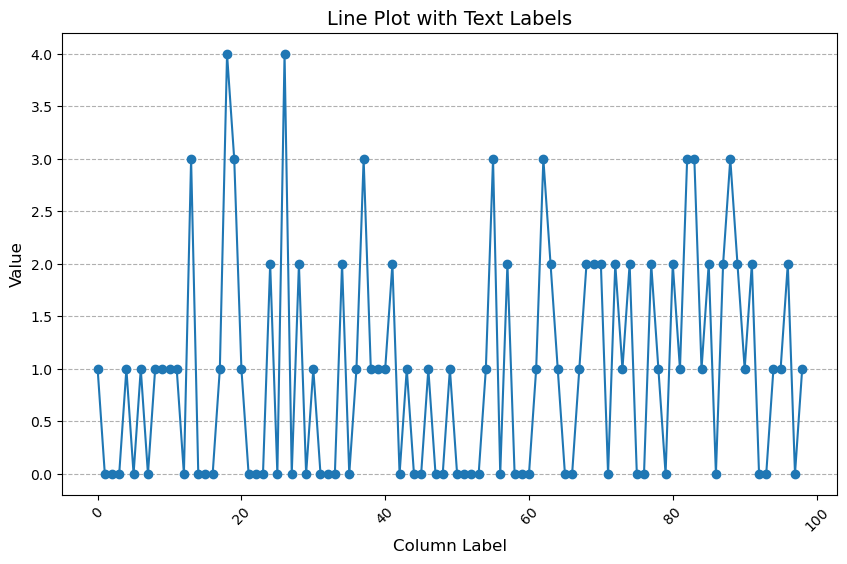

In [54]:
# Plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(numeric_array, marker='o', linestyle='-')

# Customize plot (optional)
plt.xlabel('Column Label', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Line Plot with Text Labels', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.grid(axis='y', linestyle='--')
plt.show()

In [55]:
import multirecording_spikeanalysis_edit2 as spike

# It takes several steps to create the timestamp_dicts, refer to Ephys_Analysis_Notebook to create
timestamp_dicts = pickle.load(open('timestamp_dicts.pkl', 'rb'))

# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'recordings' / 'updated_phys' / 'test'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
Unit 92 is unsorted & has 2494 spikes
Unit 92 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
Unit 103 is unsorted & has 512 spikes
Unit 103 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [56]:
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in timestamp_dicts:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = timestamp_dicts[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject
        
spike_analysis = spike.SpikeAnalysis_MultiRecording(ephys_data, timebin = 1000, ignore_freq = 0.5)

All set to analyze


In [57]:
event_df = spike_analysis.create_spiketrain_df()

In [58]:
event_df

,Recording,Event name,Event number,Unit number,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,1.0,3.0,2.0,4.0,2.0,0.0,0.0,0.0
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,16,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2713,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,17,15,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2714,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,18,15,2.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0
2715,20230622_110832_standard_comp_to_both_rewarded...,both_rewarded,19,15,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [59]:
event_df['bin_1'].value_counts()

bin_1
0.0     913
1.0     452
2.0     306
3.0     221
4.0     178
5.0     119
6.0     107
7.0      69
8.0      62
9.0      43
11.0     42
10.0     40
12.0     24
14.0     18
13.0     16
16.0     11
15.0     11
22.0      7
20.0      6
21.0      5
17.0      5
18.0      4
19.0      3
23.0      3
24.0      2
30.0      2
27.0      2
25.0      1
38.0      1
45.0      1
42.0      1
26.0      1
39.0      1
31.0      1
Name: count, dtype: int64